In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

In [28]:
consumer_complaints = pd.read_csv("complaints_dec_2014.csv")

In [29]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [ ]:
cc1 = consumer_complaints

In [ ]:
product_complaints = cc1.pop("Product")

In [ ]:
cc1.set_index(product_complaints)

In [ ]:
cc2 = consumer_complaints.groupby('Product').count()

In [ ]:
cc2["Number of Complaints"] = cc2.pop("Complaint ID")

In [ ]:
cc2["Number of Complaints"].head()

In [ ]:
cc2.plot(y="Number of Complaints", kind='bar', title="Number of Complaints by Product", figsize=(20, 10))
plt.show()

In [19]:
cc3 = consumer_complaints

In [20]:
temp = pd.DatetimeIndex(cc3['Date received'])

In [21]:
cc3['Date received'] = temp.weekday

In [22]:
cc3["Complaint ID"] = cc3["Date received"].value_counts()

In [ ]:
cc3['Date sent to company'].nunique()

In [24]:
cc3.groupby("Date received")
cc3 = cc3[0:7]
cc3

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Number of Complaints,Mean complaints per day of week,Complaint ID
0,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,3,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2544,363.428571,NaN
1,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,3,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2580,368.571429,NaN
2,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,3,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2289,327.000000,NaN
3,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,3,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,1634,233.428571,11543
4,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,3,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,1446,206.571429,NaN
5,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,3,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN,543,77.571429,NaN
6,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,3,01/07/2015,Amex,Closed with explanation,Yes,NaN,507,72.428571,NaN


In [9]:
cc3["Number of Complaints"] = cc3.pop('Complaint ID')

In [10]:
cc3["Mean complaints per day of week"] = cc3["Number of Complaints"] / 7

In [ ]:
cc3 = cc3[["Date received", "Mean complaints per day of week"]]

In [ ]:
comp_days = cc3["Date received"]
cc3.set_index("Date received")
cc3["Date received"] = cc3["Date received"][0:6]

In [ ]:
cc3

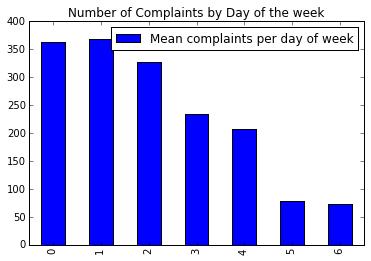

In [25]:
cc3.plot(y="Mean complaints per day of week", kind='bar', title="Number of Complaints by Day of the week")
plt.show()